In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mlgrad.func as func
import mlgrad.model as model
import mlgrad.loss as loss

import mlgrad.regr as regr
import mlgrad.af as af

In [2]:
X0 = 4*np.random.random(80)-2
Y0 = 4*X0 - 1
Y1 = Y0 + 3*np.random.random(80)-1.5
X1 = X0
X1s = X1.reshape(-1,1)

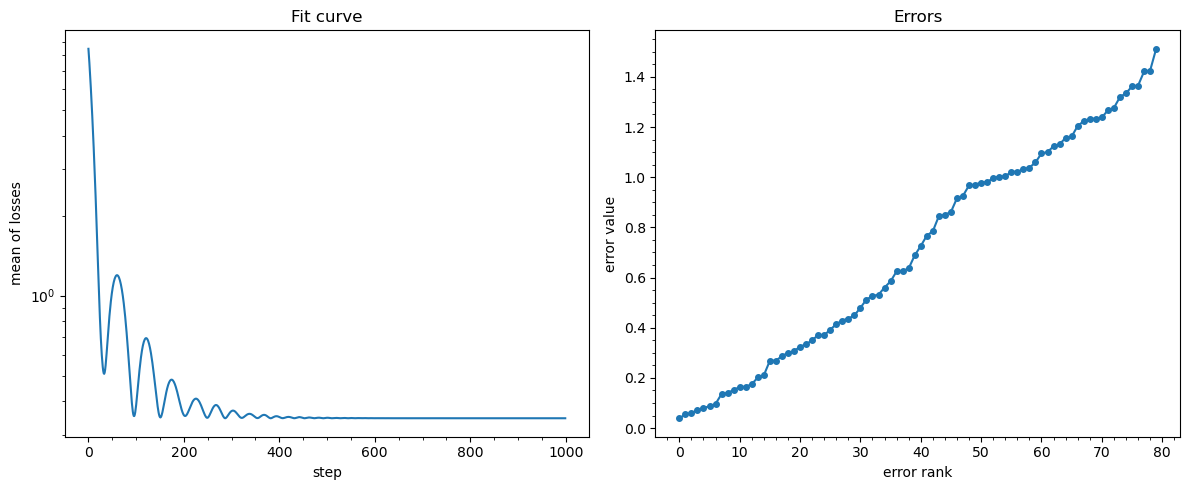

In [3]:
linmod_ols = model.LinearModel(1)
linmod_ols.init_param()
rgr_ols = regr.regression(X1s, Y1, linmod_ols, h=0.1)
regr.plot_losses_and_errors(rgr_ols, X1s, Y1, logscale=True)

In [4]:
X1_1 = np.random.random(16) + 1.5
X1_2 = -np.random.random(16) - 1.5
Y1_1 = 4*X1_1-1 - 8*np.random.random(16) - 8
Y1_2 = 4*X1_2-1 + 8*np.random.random(16) + 8

X2 = np.hstack([X1,X1_1,X1_2])
Y2 = np.hstack([Y1,Y1_1,Y1_2])

I2 = X2.argsort()
X2 = X2[I2]
Y2 = Y2[I2]

X2s = X2.reshape(-1,1)
print(80 / (80 + 32))

0.7142857142857143


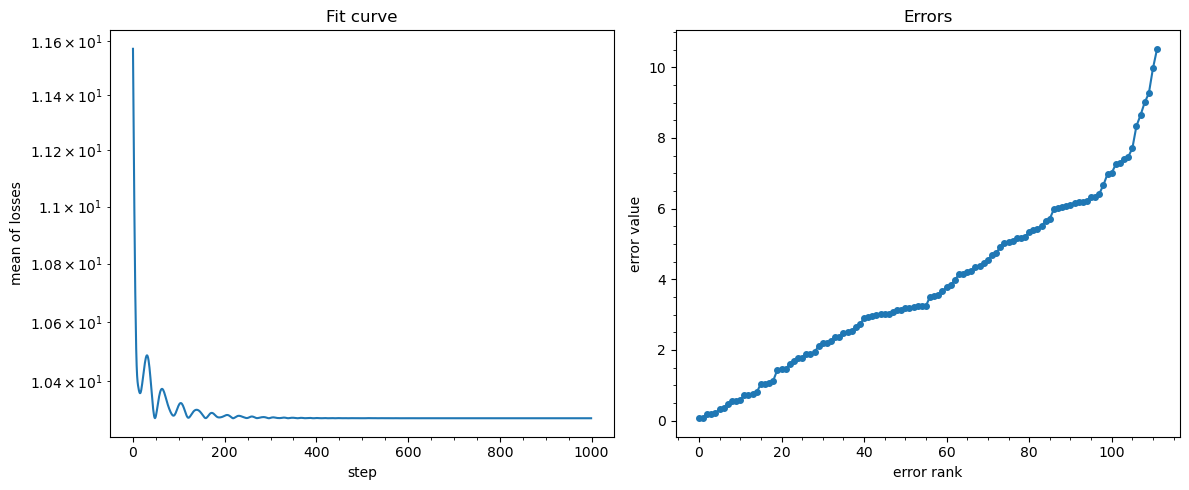

In [5]:
linmod_ols2 = model.LinearModel(1)
linmod_ols2.init_param()
rgr_ols2 = regr.regression(X2s, Y2, linmod_ols2, h=0.1)
regr.plot_losses_and_errors(rgr_ols2, X2s, Y2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


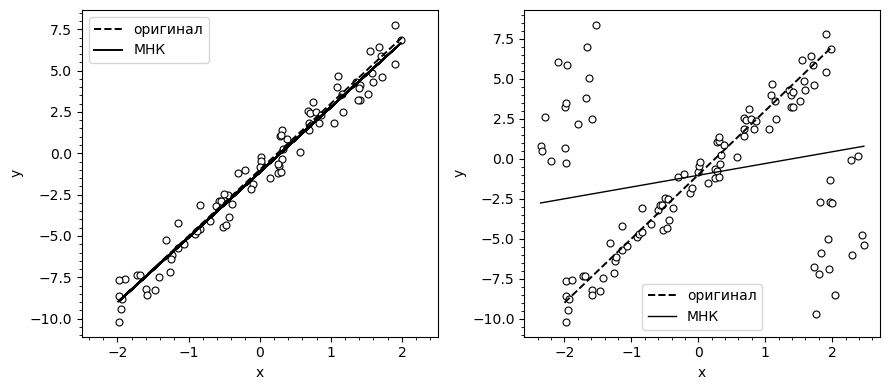

In [6]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.scatter(X1, Y1, s=25, c='w', edgecolors='k', linewidth=0.8)
plt.plot([-2,2], [-9,7], linestyle='--', linewidth=1.4, color='k', label=r'оригинал')
plt.plot(X1s, linmod_ols.evaluate_all(X1s), linewidth=1.4, color='k', label='МНК')
plt.minorticks_on()
plt.legend()
# plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2.5,2.5)
plt.subplot(1,2,2)
plt.scatter(X2, Y2, s=25, c='w', edgecolors='k', linewidth=0.8)
plt.plot([-2,2], [-9,7], linestyle='--', linewidth=1.4, color='k', label=r'оригинал')
plt.plot(X2s, linmod_ols2.evaluate_all(X2s), linewidth=1.0, color='k', label='МНК')
plt.minorticks_on()
plt.legend()
# plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('fig/simple_linear_regression_ols.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


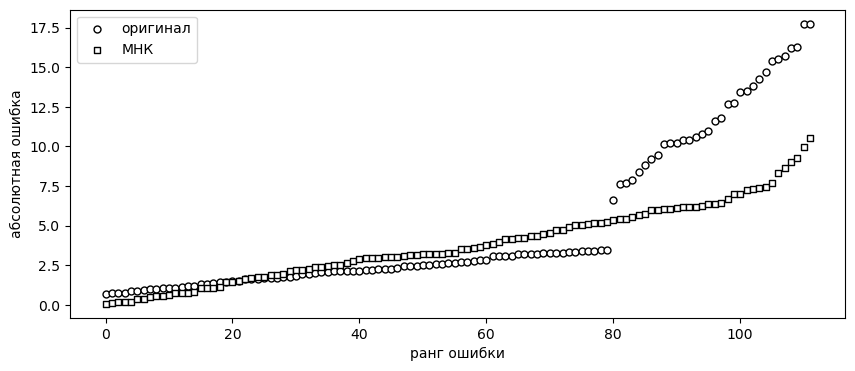

In [7]:
plt.figure(figsize=(10,4))
plt.scatter(range(len(X2)), sorted(np.abs(Y2 - 4*X2-1)), s=25, c='w', edgecolors='k', label='оригинал')
plt.scatter(range(len(X2)), sorted(np.abs(linmod_ols2.evaluate_all(X2s) - Y2)), s=16, marker='s', c='w', edgecolors='k', label='МНК')
plt.legend()
plt.savefig('fig/simple_linear_regression_ols_errors.eps')
plt.xlabel('ранг ошибки')
plt.ylabel('абсолютная ошибка')
plt.show()

3.058740136006395


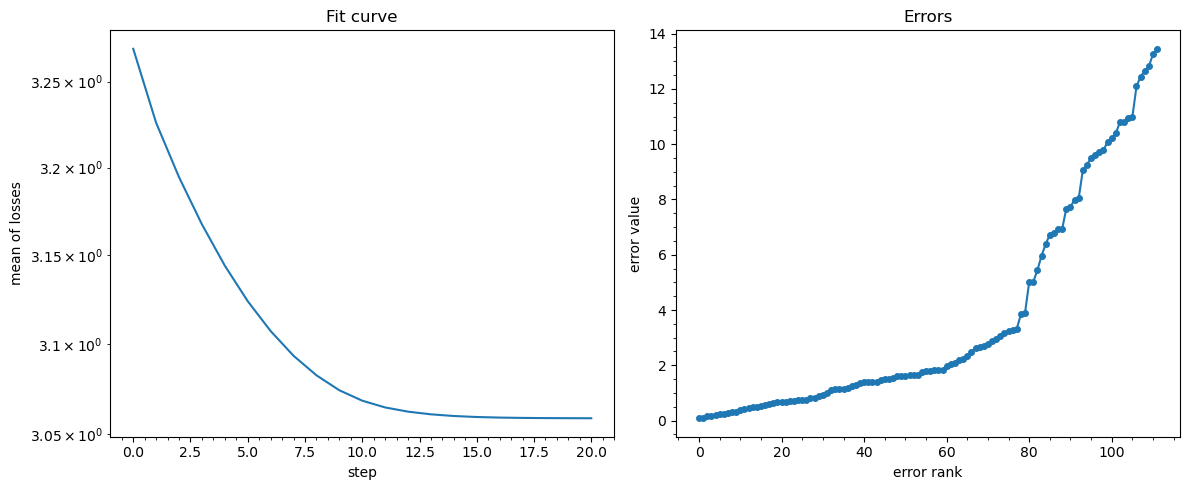

In [8]:
linmod_hub = model.LinearModel(1)
linmod_hub.init_param()
rgr_hub = regr.r_regression_irls(X2s, Y2, linmod_hub, rho_func=func.Huber(), h=0.2, n_iter2=50)
regr.plot_losses_and_errors(rgr_hub, X2s, Y2)

15.953301390841599


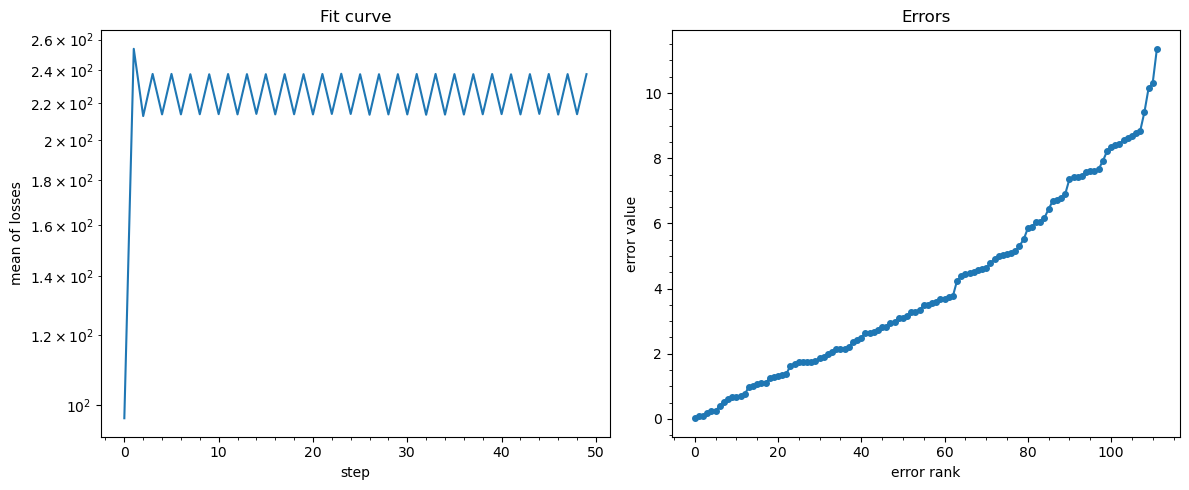

In [9]:
linmod_tuk = model.LinearModel(1)
linmod_tuk.init_param()
rgr_tuk = regr.r_regression_irls(X2s, Y2, linmod_tuk, rho_func=func.Tukey(), h=0.1, n_iter2=50)
regr.plot_losses_and_errors(rgr_tuk, X2s, Y2)

1.7176769821216362


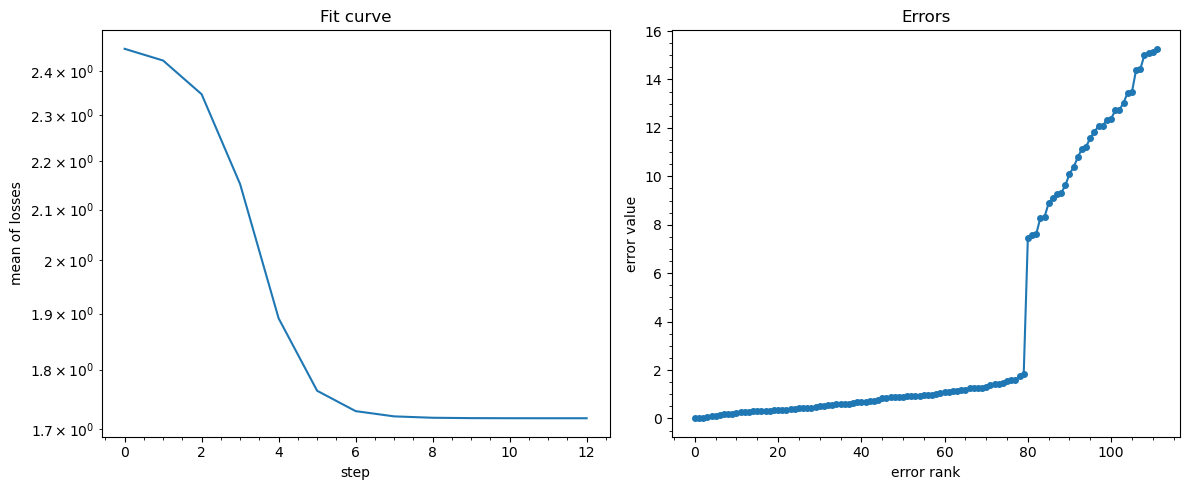

In [10]:
linmod_logsq = model.LinearModel(1)
linmod_logsq.init_param()
rgr_logsq = regr.r_regression_irls(X2s, Y2, linmod_logsq, rho_func=func.LogSquare(), h=0.2, n_iter2=100)
regr.plot_losses_and_errors(rgr_logsq, X2s, Y2)

In [11]:
X1_11 = np.random.random(30) + 1.5
X1_21 = -np.random.random(30) - 1.5
Y1_11 = 4*X1_11-1 - 8*np.random.random(30) - 8
Y1_21 = 4*X1_21-1 + 8*np.random.random(30) + 8

X3 = np.hstack([X1,X1_11,X1_21])
Y3 = np.hstack([Y1,Y1_11,Y1_21])

I3 = X3.argsort()
X3 = X3[I3]
Y3 = Y3[I3]
X3s = X3.reshape(-1,1)

print(80/(80 + 60))

0.5714285714285714


3.341846149183868


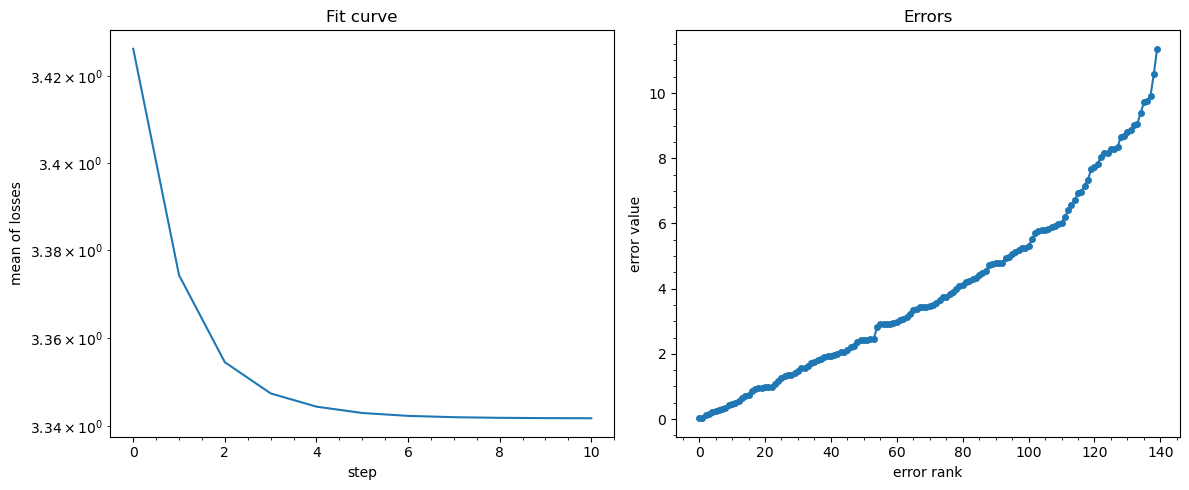

In [12]:
linmod_hub2 = model.LinearModel(1)
linmod_hub2.init_param()
rgr_hub2 = regr.r_regression_irls(X3s, Y3, linmod_hub2, rho_func=func.Huber(), h=0.1, n_iter2=50)
regr.plot_losses_and_errors(rgr_hub2, X3s, Y3)

20.342646640822114


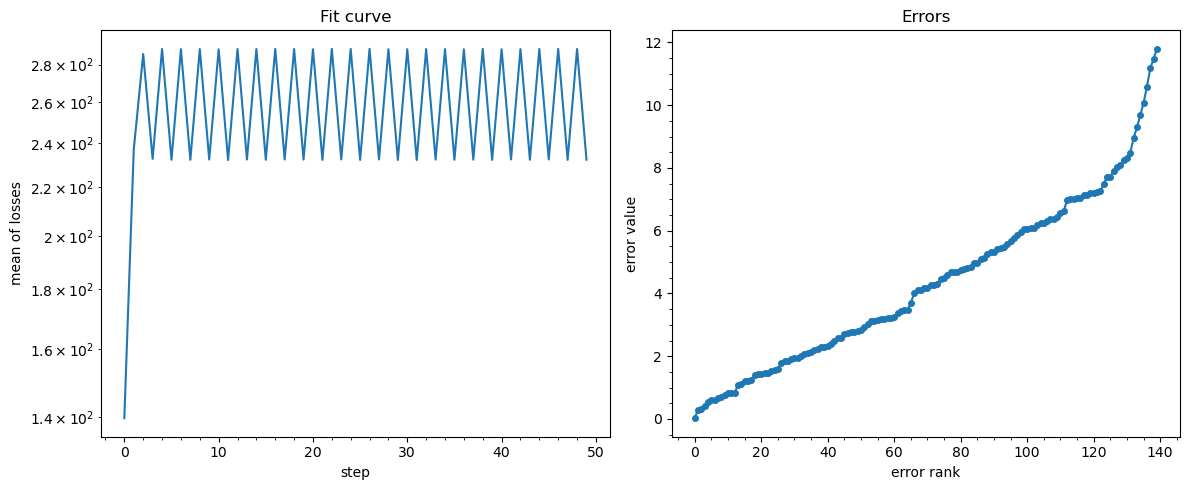

In [13]:
linmod_tuk2 = model.LinearModel(1)
linmod_tuk2.init_param()
rgr_tuk2 = regr.r_regression_irls(X3s, Y3, linmod_tuk2, rho_func=func.Tukey(), h=0.1, n_iter2=50)
regr.plot_losses_and_errors(rgr_tuk2, X3s, Y3)

2.3757898892251044


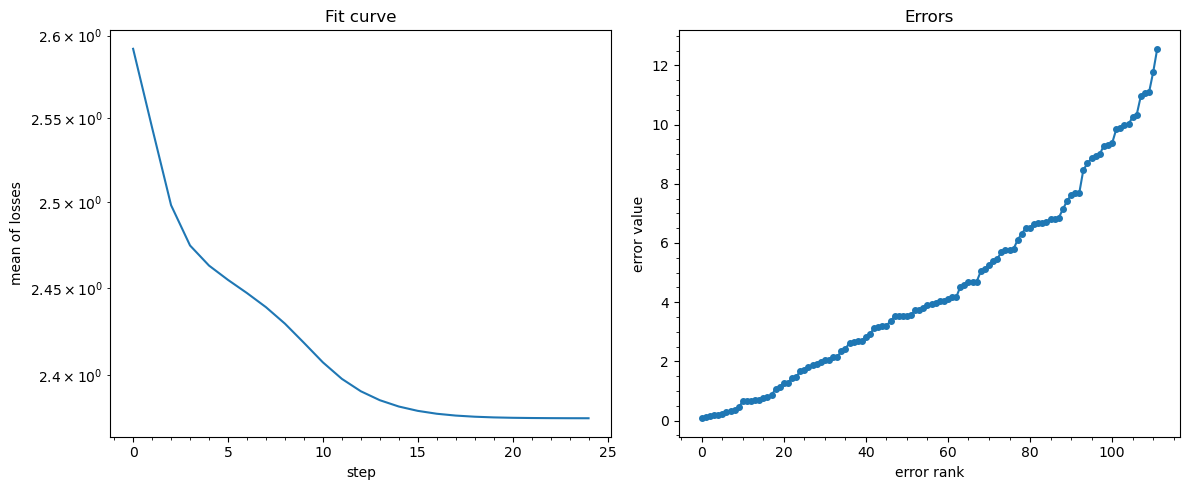

In [14]:
linmod_logsq2 = model.LinearModel(1)
linmod_logsq2.init_param()
rgr_logsq2 = regr.r_regression_irls(X3s, Y3, linmod_logsq2, rho_func=func.LogSquare(), h=0.1, n_iter2=50)
regr.plot_losses_and_errors(rgr_logsq2, X2s, Y2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


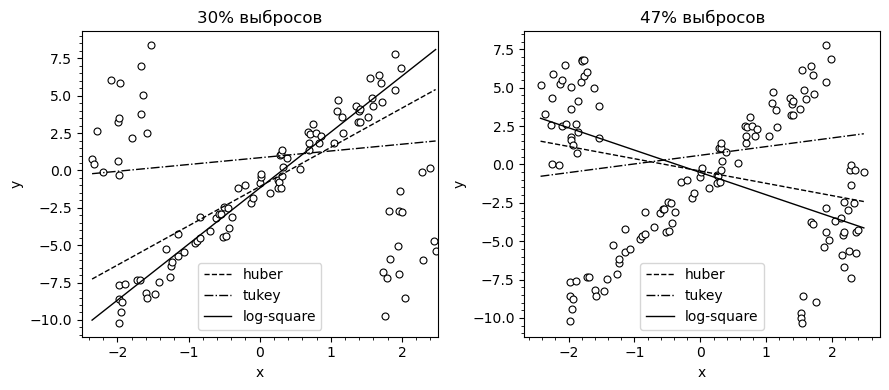

In [15]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.title("30% выбросов")
plt.scatter(X2, Y2, s=25, c='w', edgecolors='k', linewidth=0.8)
plt.plot(X2s, linmod_hub.evaluate_all(X2s), linestyle='--', linewidth=1., color='k', label='huber')
plt.plot(X2s, linmod_tuk.evaluate_all(X2s), linestyle='-.', linewidth=1., color='k', label='tukey')
plt.plot(X2s, linmod_logsq.evaluate_all(X2s), linewidth=1., color='k', label='log-square')
plt.minorticks_on()
plt.legend()
# plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2.5,2.5)
plt.subplot(1,2,2)
plt.title("47% выбросов")
plt.scatter(X3, Y3, s=25, c='w', edgecolors='k', linewidth=0.8)
plt.plot(X3s, linmod_hub2.evaluate_all(X3s), linestyle='--', linewidth=1., color='k', label='huber')
plt.plot(X3s, linmod_tuk2.evaluate_all(X3s), linestyle='-.', linewidth=1., color='k', label='tukey')
plt.plot(X3s, linmod_logsq2.evaluate_all(X3s), linewidth=1., color='k', label='log-square')
plt.minorticks_on()
plt.legend()
# plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('fig/simple_linear_regression_rob_class.eps')
plt.show()

0.7167596635198122


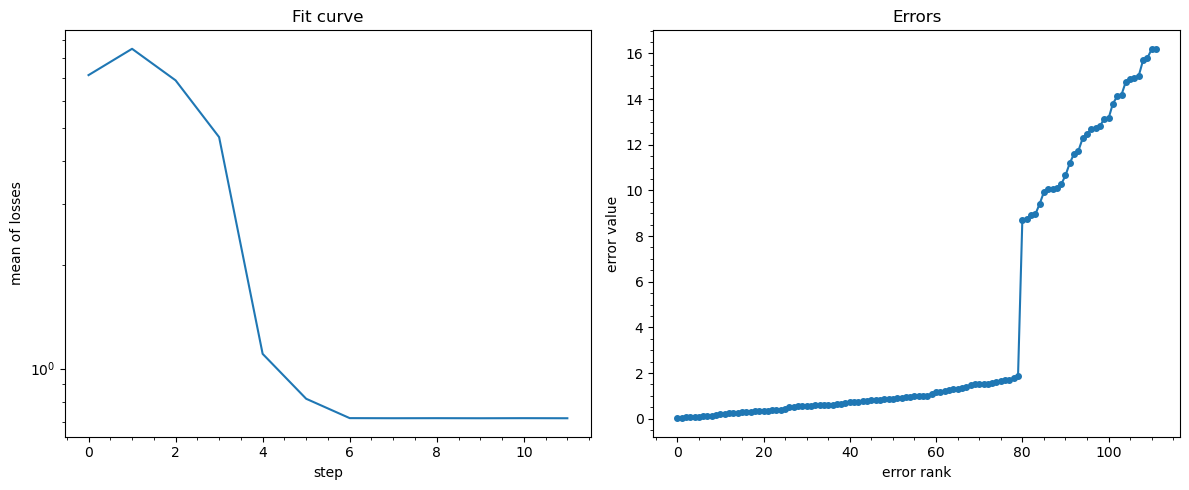

In [16]:
linmod_wm1 = model.LinearModel(1)
linmod_wm1.init_param()
aggfunc1 = af.averaging_function("WM", rhofunc=func.QuantileFunc(0.69, func.Sqrt(0.001)))
rgr_wm1 = regr.m_regression_irls(X2s, Y2, linmod_wm1, agg_func=aggfunc1, h=0.001)
regr.plot_losses_and_errors(rgr_wm1, X2s, Y2)

0.7776109902760538


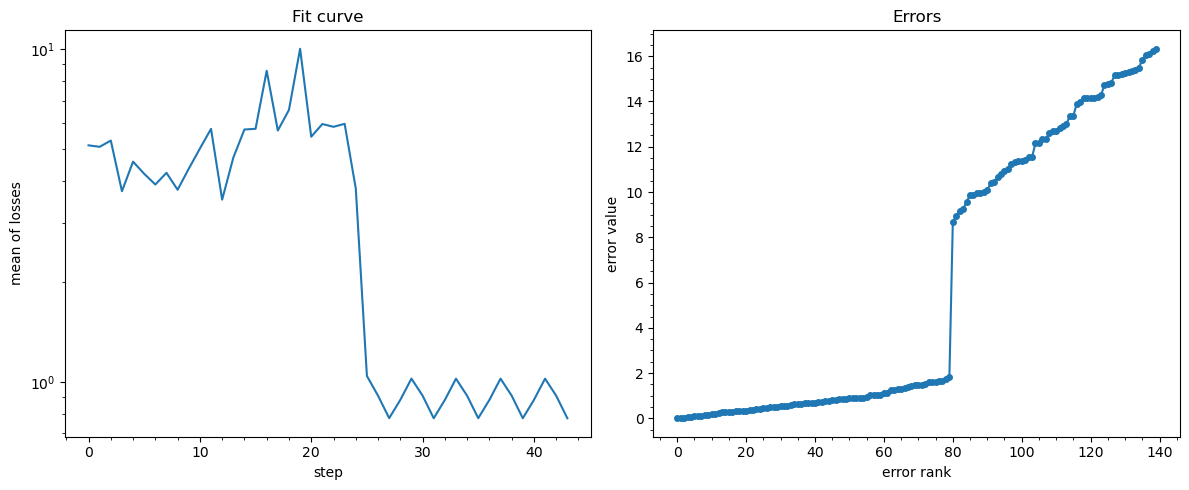

In [17]:
linmod_wm2 = model.LinearModel(1)
linmod_wm2.init_param()
aggfunc2 = af.averaging_function("WM", rhofunc=func.QuantileFunc(0.53, func.Sqrt(0.001)))
rgr_wm2 = regr.m_regression_irls(X3s, Y3, linmod_wm2, agg_func=aggfunc2, h=0.1, n_iter2=50)
regr.plot_losses_and_errors(rgr_wm2, X3s, Y3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


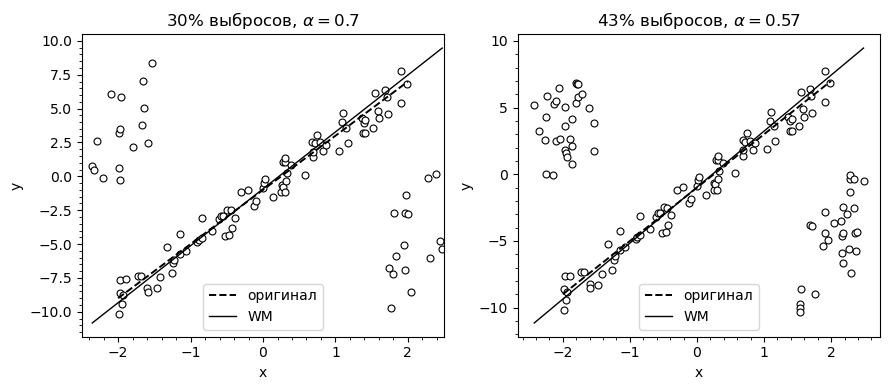

In [18]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.title(r"30% выбросов, $\alpha=0.7$")
plt.scatter(X2, Y2, s=25, c='w', edgecolors='k', linewidth=0.8)
plt.plot([-2,2], [-9,7], linestyle='--', linewidth=1.4, color='k', label=r'оригинал')
plt.plot(X2s, linmod_wm1.evaluate_all(X2s), linewidth=1., color='k', label='WM')
plt.minorticks_on()
plt.legend()
# plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2.5,2.5)
plt.subplot(1,2,2)
plt.title(r"43% выбросов, $\alpha=0.57$")
plt.scatter(X3, Y3, s=25, c='w', edgecolors='k', linewidth=0.8)
plt.plot([-2,2], [-9,7], linestyle='--', linewidth=1.4, color='k', label=r'оригинал')
plt.plot(X3s, linmod_wm2.evaluate_all(X3s), linewidth=1., color='k', label='WM')
plt.minorticks_on()
plt.legend()
# plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('fig/simple_linear_regression_robust.eps')
plt.show()

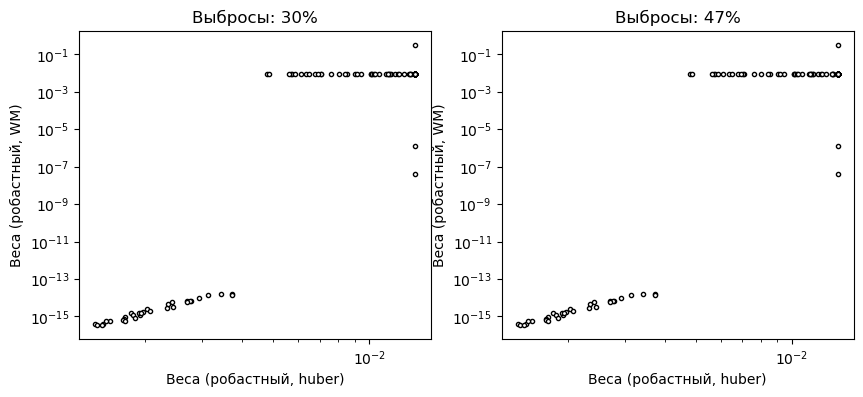

In [19]:
V1_1 = np.array(rgr_hub.weights.weights)
V1_2 = np.array(rgr_wm1.weights.weights)
# V1 = V1_1/V1_2
# V1 = np.sort(V1)

V2_1 = np.array(rgr_hub2.weights.weights)
V2_2 = np.array(rgr_wm2.weights.weights)
# V2 = V2_1/V2_2
# V2 = np.sort(V2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Выбросы: 30%')
plt.scatter(V1_1, V1_2, color='w', s=9, edgecolors='k')
plt.xlabel('Веса (робастный, huber)')
plt.ylabel('Веса (робастный, WM)')
plt.minorticks_on()
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.subplot(1,2,2)
plt.title('Выбросы: 47%')
plt.scatter(V1_1, V1_2, color='w', s=9, edgecolors='k')
plt.xlabel('Веса (робастный, huber)')
plt.ylabel('Веса (робастный, WM)')
plt.minorticks_on()
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.show()

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.title(r"30% выбросов, $\alpha=0.7$")
# plt.plot(sorted(V1_1, reverse=True), label='huber', linestyle='--', color='k')
# plt.plot(sorted(V1_2, reverse=True), label='wm', color='k')
# plt.legend()
# plt.xlabel('Ранг')
# plt.ylabel('Вес*100')
# plt.minorticks_on()
# plt.gca().set_yscale('log')
# plt.subplot(1,2,2)
# plt.title(r"43% выбросов, $\alpha=0.57$")
# plt.plot(sorted(V2_1, reverse=True), label='huber', linestyle='--', color='k')
# plt.plot(sorted(V2_2, reverse=True), label='wm', color='k')
# plt.legend()
# plt.xlabel('Ранг')
# plt.ylabel('Вес*100')
# plt.minorticks_on()
# plt.gca().set_yscale('log')
# plt.tight_layout()
# plt.show()

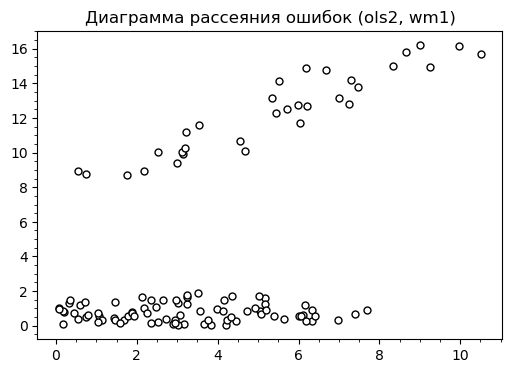

In [20]:
plt.figure(figsize=(6,4))
errs_ols2 = np.abs(linmod_ols2.evaluate_all(X2s) - Y2)
errs_wm1 = np.abs(linmod_wm1.evaluate_all(X2s) - Y2)
# ee = min([max(errs_ols2), max(errs_wm1)])
plt.title('Диаграмма рассеяния ошибок (ols2, wm1)')
plt.scatter(errs_ols2, errs_wm1, s=25, c='w', edgecolors='k')
# plt.plot([0,ee], [0,ee], color='k', linestyle='--')
plt.savefig('fig/simple_linear_regression_errs_roberrs.eps')
# plt.xlabel('абсолютная ошибка (ols2)')
# plt.ylabel('абсолютная ошибка (wm1)')
plt.minorticks_on()
plt.show()

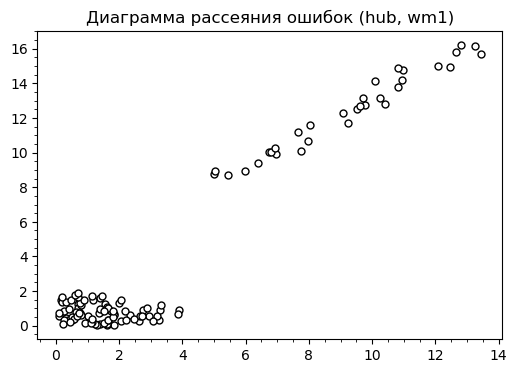

In [21]:
plt.figure(figsize=(6,4))
errs1 = np.abs(linmod_hub.evaluate_all(X2s) - Y2)
errs2 = np.abs(linmod_wm1.evaluate_all(X2s) - Y2)
# ee = min([max(errs_ols2), max(errs_wm1)])
plt.title('Диаграмма рассеяния ошибок (hub, wm1)')
plt.scatter(errs1, errs2, s=25, c='w', edgecolors='k')
# plt.plot([0,ee], [0,ee], color='k', linestyle='--')
plt.savefig('fig/simple_linear_regression_errs_roberrs.eps')
# plt.xlabel('абсолютная ошибка (ols2)')
# plt.ylabel('абсолютная ошибка (wm1)')
plt.minorticks_on()
plt.show()